In [1]:
# importing relevant modules
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp


In [18]:
# setting pararmeters
a = 1
b = 0.2
d= 0.1

In [3]:
# predator-prey equations
def f(t,z,a,b,d):
    x, y = z[0], z[1]
    return [x*(1-x) - (a*x*y)/(d+x), (b*y)*(1 - y/x)]

In [4]:
# solving the equations
sol = solve_ivp(f, (0,100),(1,1), args=(a,b,d), rtol=1e-6)

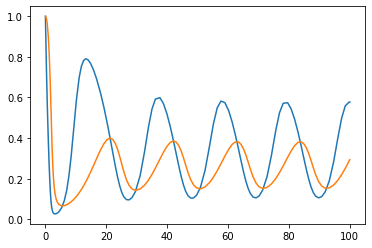

In [5]:
# plotting a graph of the solutions
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])

In [6]:
#When b>0.26 over a long-time limit there is convergence 
#When b<0.26 over a long-time limit the amplitude 

In [7]:
#Determining an appropriate phase-condition for the limit cycle
#x*(1-x) - (a*x*y)/(d+x) = 0

In [8]:
#Construct the shooting root-finding problem
def g(u0, fun, args):
    u, T = u0[:2], u0[2]
    sol = solve_ivp(fun, (0,T), u, args = args, rtol = 1e-6)
    final_states = sol.y[:,-1]
    phase_condition = np.array([fun(T, u, args[0], args[1], args[2])[0]])
    return np.concatenate((u-final_states, phase_condition))

In [9]:
#find the roots of g with an initial guess
from scipy.optimize import fsolve
root = fsolve(g,[1.5,1.5,20],args = (f, (a,b,d)))
root

array([ 0.57787432,  0.28614816, 20.81687488])

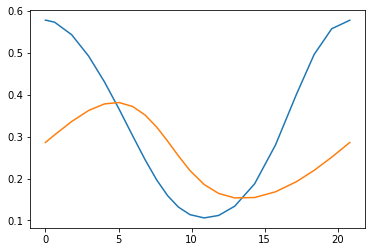

In [10]:
#plot the solution
sol = solve_ivp(f, (0,root[2]), root[:2], args = (a,b,d), rtol = 1e-6)
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])

In [ ]:
# Attempting to generalise the code
# Improvements:
# adjust code such that user can pass the phase-condition
# make adjustments so that it's more general for

In [35]:
# define a system of 3 odes
def h(t,z,a,b,d):
    x, y, w = z[0], z[1], z[2]
    return [x*w*(1-x) - (a*x*y)/(d+x), (b*y)*(1 - y/(x))+w, w*(1-x)]

In [36]:
#Generalising your code so that you can use arbitrary differential equations of arbitrary dimension

def s(u0, fun, args):
    u, T = u0[:-1], u0[-1]
    sol = solve_ivp(fun, (0,T), u, args = args, rtol = 1e-6)
    final_states = sol.y[:,-1]
    phase_condition = np.array([fun(T, u, args[0], args[1], args[2])[0]])
    return np.concatenate((u-final_states, phase_condition))

In [37]:
#find the roots of h with an initial guess
from scipy.optimize import fsolve
root = fsolve(s,[1.2,1.2,1.2,15],args = (h, (a,b,d)))
root

array([ 1.68461795e+00, -7.37390762e-11, -4.77624093e-13,  5.77897806e+00])

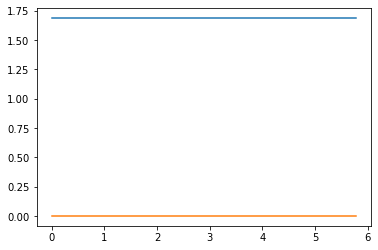

In [38]:
#plot the solution
sol = solve_ivp(h, (0,root[-1]), root[:-1], args = (a,b,d), rtol = 1e-6)
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])